In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

df = pd.read_csv('project.csv')

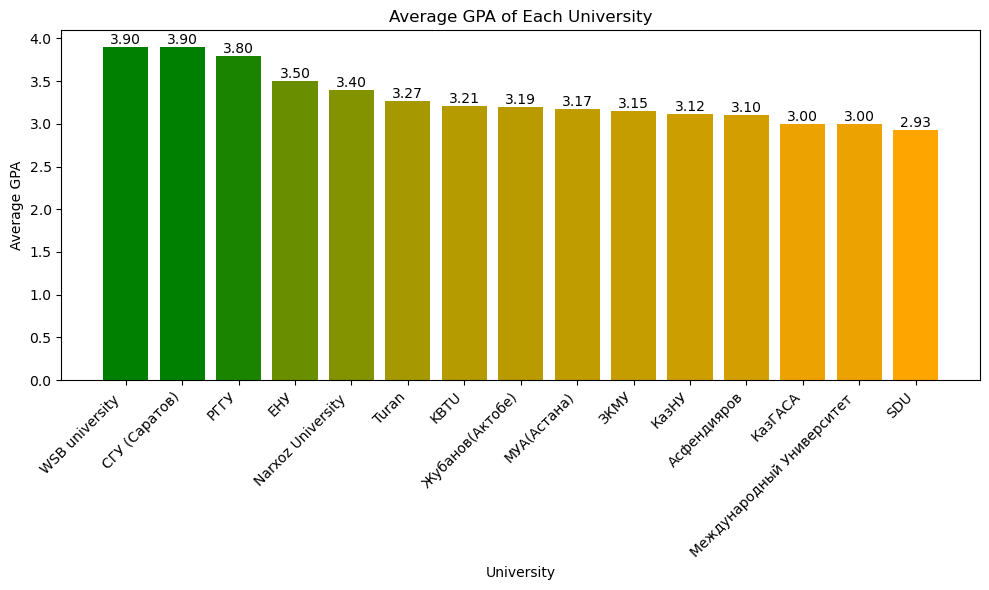

In [141]:
# Среднее значение гпа у студентов разных университета
average_gpa_by_university = df.groupby('University')['GPA'].mean().sort_values(ascending=False)

cmap = mcolors.LinearSegmentedColormap.from_list("green_to_red", [(0, "yellow"), (1, "green")])
norm = mcolors.Normalize(vmin=average_gpa_by_university.min(), vmax=average_gpa_by_university.max())

plt.figure(figsize=(10, 6))
bars = plt.bar(average_gpa_by_university.index, average_gpa_by_university.values, 
               color=cmap(norm(average_gpa_by_university.values)))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

plt.xlabel('University')
plt.ylabel('Average GPA')
plt.title('Average GPA of Each University')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

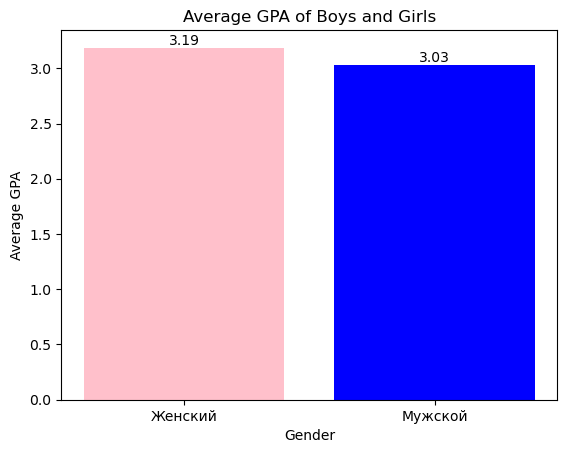

In [135]:
# Среднее значение гпа девочек и мальчиков
average_gpa_by_gender = df.groupby('Gender')['GPA'].mean()

plt.bar(average_gpa_by_gender.index, average_gpa_by_gender.values, color=['pink', 'blue'])

for i, value in enumerate(average_gpa_by_gender.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.title('Average GPA of Boys and Girls')
plt.xticks(range(len(average_gpa_by_gender.index)), average_gpa_by_gender.index)
plt.show()

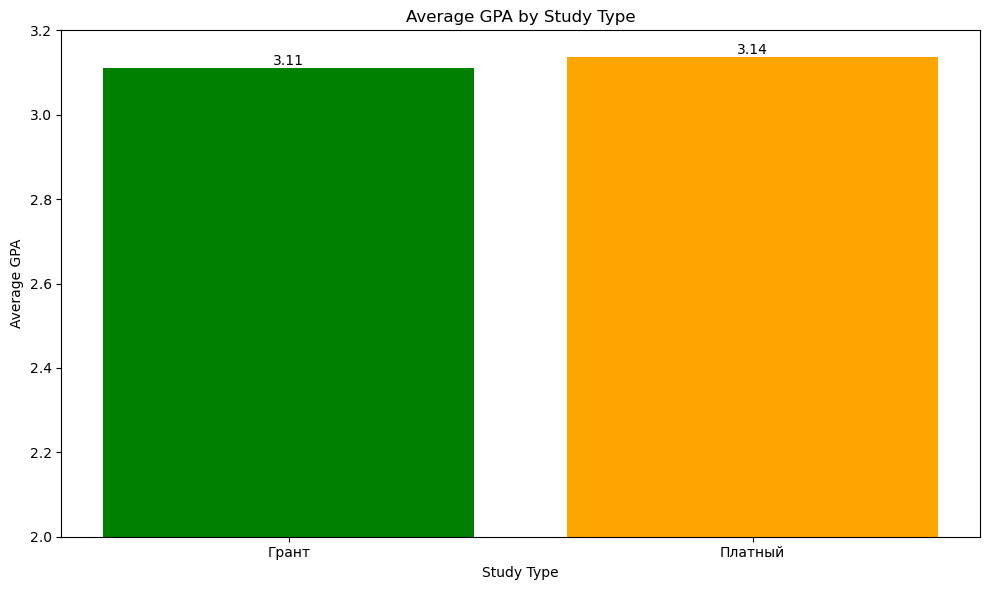

In [136]:
# Среднее значение гпа грантников и платников
average_gpa_by_study_type = df.groupby('StudyType')['GPA'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(average_gpa_by_study_type.index, average_gpa_by_study_type.values, color=['green', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

plt.xlabel('Study Type')
plt.ylabel('Average GPA')
plt.title('Average GPA by Study Type')
# plt.xticks(ra='right')
plt.ylim(2, 3.2)  # Set y-axis limits
plt.tight_layout()
plt.show()

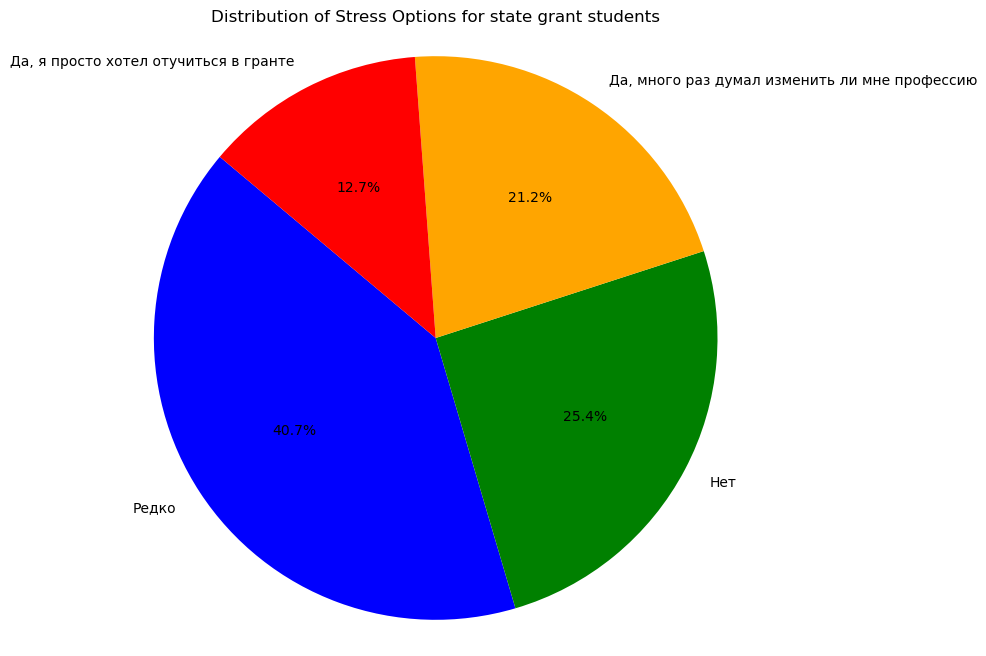

In [118]:
#Чувствуют ли грантники стресс, если да зачем
grant_df = df[df['StudyType'] == 'Грант']

excluded_stress_options = ['получаю стресс но не хочу изменить профессию',
                           'Получал стресс изза того что приходилось много учиться ',
                           'Я мечтал об этом ',
                           'Не получаю удовольствия ']

filtered_grant_df = grant_df[~grant_df['Stress'].isin(excluded_stress_options)]
stress_counts = filtered_grant_df['Stress'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red'])
plt.title('Distribution of Stress Options for state grant students')
plt.axis('equal')
plt.show()

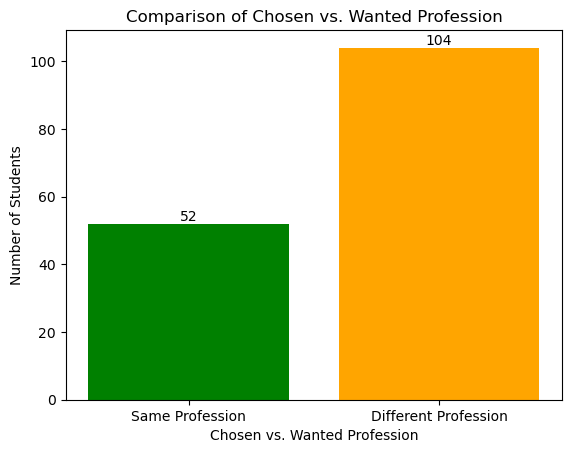

In [134]:
# Кто учится на того кого хотел а кто нет
same_profession = df[df['ChosenProfession'] == df['WantedProfession']].shape[0]
different_profession = df[df['ChosenProfession'] != df['WantedProfession']].shape[0]

# Create a bar chart
bars = plt.bar(['Same Profession', 'Different Profession'], [same_profession, different_profession], color = ['green', 'orange'])
plt.xlabel('Chosen vs. Wanted Profession')
plt.ylabel('Number of Students')
plt.title('Comparison of Chosen vs. Wanted Profession')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

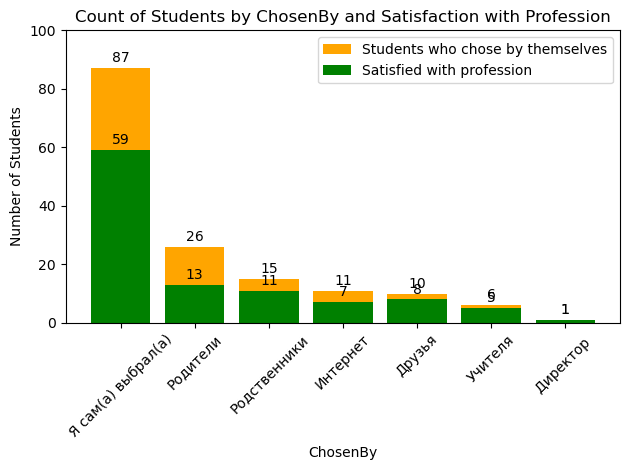

In [140]:
# Кто выбрал профессию и довольны ли они
bar_colors = {
    "Orange": 'orange',
    "Green": 'green'
}

chosenby_categories = ['Я сам(а) выбрал(а)', 'Родители', 'Родственники', 'Интернет', 'Директор ', 'Учителя', 'Друзья']

chosenby_counts = []
satisfied_counts = []

for chosenby in chosenby_categories:
    chosenby_count = len(df[df['ChosenBy'] == chosenby])
    chosenby_counts.append(chosenby_count)
    
    satisfied_count = len(df[(df['ChosenBy'] == chosenby) & (df['Stress'].isin(['Нет', 'Редко']))])
    satisfied_counts.append(satisfied_count)

chosenby_categories, chosenby_counts, satisfied_counts = zip(*sorted(zip(chosenby_categories, chosenby_counts, satisfied_counts), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots()

ax.bar(chosenby_categories, chosenby_counts, color=bar_colors["Orange"], label='Students who chose by themselves')
ax.bar(chosenby_categories, satisfied_counts, color=bar_colors["Green"], label='Satisfied with profession')

for i, v in enumerate(chosenby_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

for i, v in enumerate(satisfied_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

plt.xlabel('ChosenBy')
plt.ylabel('Number of Students')
plt.title('Count of Students by ChosenBy and Satisfaction with Profession')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

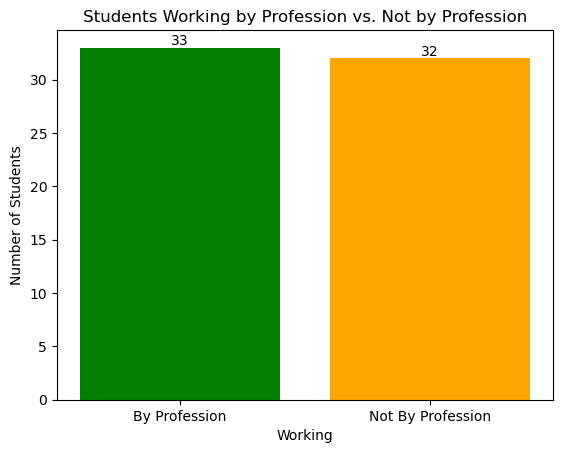

In [137]:
workingDF = df[df['Working'] != 'Нет']

# Сколько из них работает по профессии
working_by_profession_count = workingDF[workingDF['Working'] == workingDF['ByProfession']].shape[0]
working_not_by_profession_count = workingDF[workingDF['Working'] != workingDF['ByProfession']].shape[0]

plt.bar(['By Profession', 'Not By Profession'], [working_by_profession_count, working_not_by_profession_count], color=['green', 'orange'])

for i, count in enumerate([working_by_profession_count, working_not_by_profession_count]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Working')
plt.ylabel('Number of Students')
plt.title('Students Working by Profession vs. Not by Profession')
plt.show()


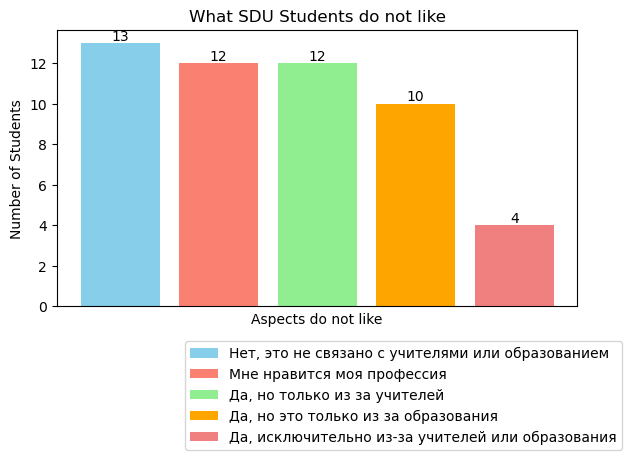

In [138]:
# Какие недовольство есть у СДУшников
sdu_students = df[df['University'] == 'SDU']

adl_counts = sdu_students['ADL'].value_counts()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

bars = plt.bar(range(len(adl_counts)), adl_counts.values, color=colors)

for bar, count in zip(bars, adl_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

plt.xticks([])
plt.xlabel('Aspects do not like')
plt.ylabel('Number of Students')
plt.title('What SDU Students do not like')
plt.legend(bars, adl_counts.index, loc='upper right', bbox_to_anchor=(1.1, -0.1), ncol=1)
plt.tight_layout()
plt.show()

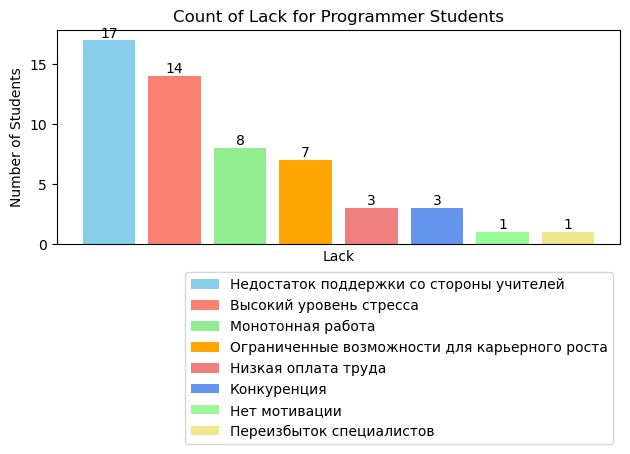

In [139]:
# Какие недостатки есть у професси программиста
programmer_students = df[df['ChosenProfession'] == 'Программист']

lack_counts = programmer_students['Lack'].value_counts()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue', 'palegreen', 'khaki']

bars = plt.bar(range(len(lack_counts)), lack_counts.values, color=colors)

for bar, count in zip(bars, lack_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

plt.xticks([])
plt.xlabel('Lack')
plt.ylabel('Number of Students')
plt.title('Count of Lack for Programmer Students')
plt.legend(bars, lack_counts.index, loc='upper right', bbox_to_anchor=(1, -0.1), ncol=1)
plt.tight_layout()
plt.show()